In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
prev_path = "\\".join(list(os.getcwd().split('\\')[0:-1]))
if module_path not in sys.path: sys.path.append(prev_path)
from models.rolling import RollingModel
from models.data.handler import DataHandler
from models.data.source import Eikon
import numpy as np

In [2]:
data_path = r'C:\Users\serge\IdeaProjects\portfolio_manager\data\fama-french-factors'
path_apikeys = r'C:\Users\serge\OneDrive\Documents\apikeys.csv'

rics_list = [
    'LVMH.PA', 'ASML.AS', 'NESN.S', 'LIN',
    'NOVOb.CO', 'AAPL.O', 'ROG.S', 'UNH',
    'SAPG.DE', 'MSFT.O'
]

params = {
    'rics': rics_list,
    'field': ['TR.PriceClose', 'Price Close'],
    'date_field': ['TR.PriceClose.calcdate', 'Calc Date'],
    'load_path': r'C:\Users\serge\IdeaProjects\portfolio_manager\portfolio_management\models\data\csv'
}

config = {
    'PCA': True,
    'n_components': 7,
    'OLS': True
}

HORIZON_IN_DAYS = 14

In [3]:
eikon_api = Eikon(path_apikeys)
data = eikon_api.load_timeseries(**params)

Loaded: LVMH.PA
Loaded: ASML.AS
Loaded: NESN.S
Loaded: LIN
Loaded: NOVOb.CO
Loaded: AAPL.O
Loaded: ROG.S
Loaded: UNH
Loaded: SAPG.DE
Loaded: MSFT.O


In [4]:
data_handler = DataHandler(data=data, date_col=params['date_field'][1])
returns = data_handler.get_returns(period=HORIZON_IN_DAYS, out=True)

In [5]:
returns.head(10)

,LVMH.PA,ASML.AS,NESN.S,LIN,NOVOb.CO,AAPL.O,ROG.S,UNH,SAPG.DE,MSFT.O
2000-01-24,0.065005,0.233634,0.010657,-0.003839,0.020305,0.035932,0.013165,0.039266,0.208832,-0.106471
2000-02-11,-0.047009,0.010471,-0.078630,-0.259036,0.053803,0.023257,0.009492,0.014615,0.120648,-0.013048
2000-03-02,-0.076912,0.067363,0.089175,-0.140676,0.000000,0.114969,-0.001350,-0.064539,0.058945,-0.067921
2000-03-22,0.076179,-0.113302,0.031661,0.140676,0.077842,0.167093,0.039740,0.008299,0.028624,0.100530
2000-04-11,0.047275,-0.069692,0.031018,0.169224,-0.054312,-0.188321,-0.067139,0.211984,-0.336598,-0.207826
2000-05-05,0.065005,0.051093,0.018868,0.034462,0.150823,-0.054300,-0.011173,-0.036969,0.017363,-0.164889
2000-05-26,-0.022095,-0.133860,0.060037,-0.092198,0.109751,-0.269795,0.011173,0.184961,-0.200468,-0.146418
2000-06-20,-0.049930,0.154789,-0.019614,-0.095013,-0.051482,0.158894,-0.043119,0.055280,0.223379,0.198634
2000-07-10,0.031668,0.034952,0.018400,-0.033226,0.147118,0.120796,-0.000599,0.085842,-0.139780,0.058316
2000-07-31,0.065498,-0.096942,0.054978,0.066964,0.021908,-0.117099,-0.062424,-0.065779,0.234749,-0.129157


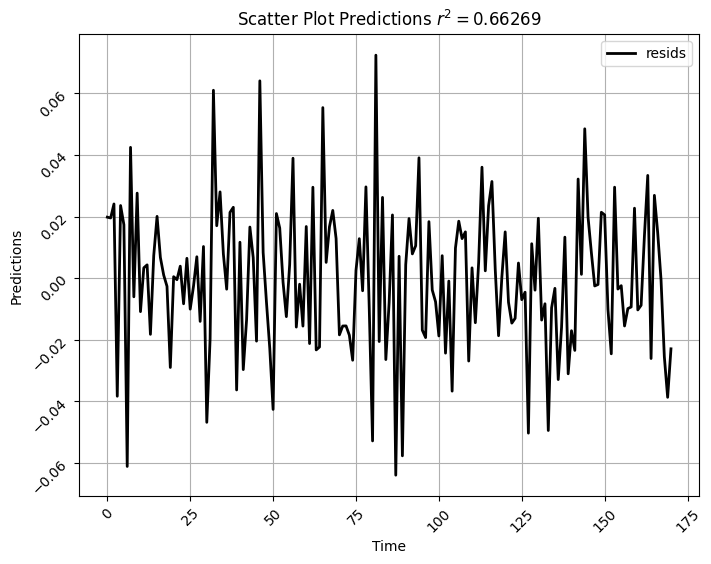

In [6]:
rolling = RollingModel(rolling_window=200, data=returns, demean=True)
rolling.estimate(config=config, RIC=rics_list[2])
rolling.plot_resids()

In [7]:
rolling.r_sqr

0.6626937378296409